In [4]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.model_selection import train_test_split
from   sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
sns.set(style="white", color_codes=True)

In [5]:
df_raw = pd.read_csv("mushrooms.csv")

In [6]:
from sklearn.preprocessing import LabelEncoder
df = df_raw.copy()
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df = df.drop(columns=['class'])
df.insert(0, 'class', df_raw['class'])

In [7]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,e,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,e,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,p,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


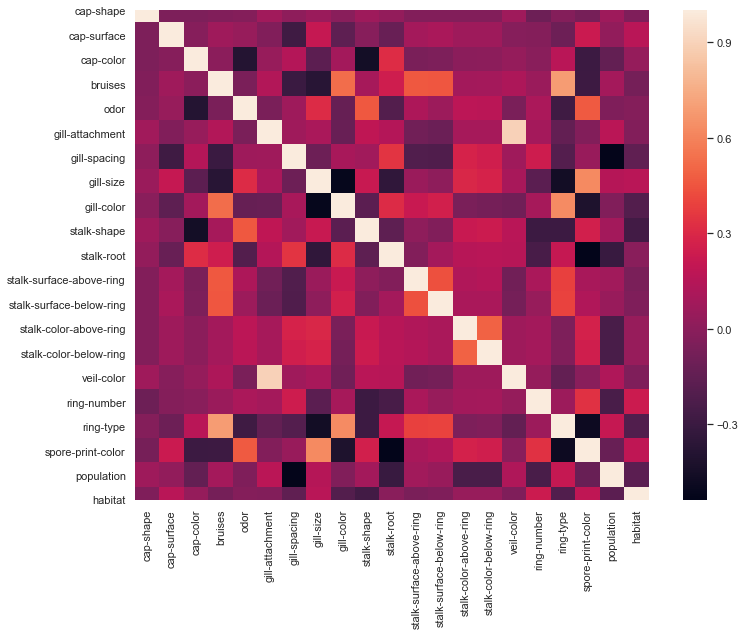

In [8]:
plt.subplots(figsize=(12,9))
dfm = df.drop(columns=['veil-type'])
sns.heatmap(dfm.corr(), square=True, cbar=True)

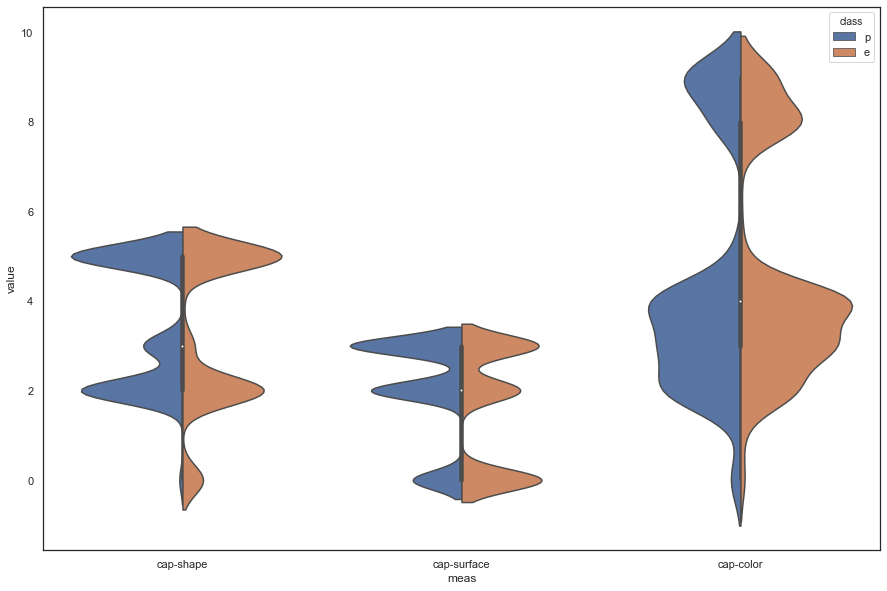

In [9]:
plt.figure(figsize=(15,10))
dfc=df[['class', 'cap-shape', 'cap-surface', 'cap-color']]
dfm=pd.melt(dfc, "class", var_name="meas")
sns.violinplot(data=dfm, x="meas", y="value", hue="class", size=10, split=True)

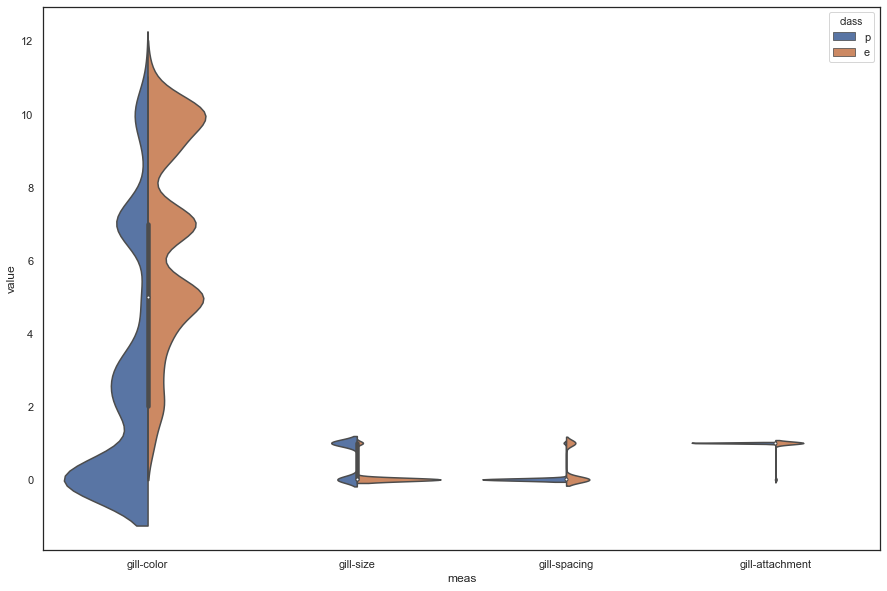

In [10]:
plt.figure(figsize=(15,10))
dfc=df[['class', 'gill-color', 'gill-size', 'gill-spacing', 'gill-attachment']]
dfm=pd.melt(dfc, "class", var_name="meas")
sns.violinplot(data=dfm, x="meas", y="value", hue="class", size=10, split=True)

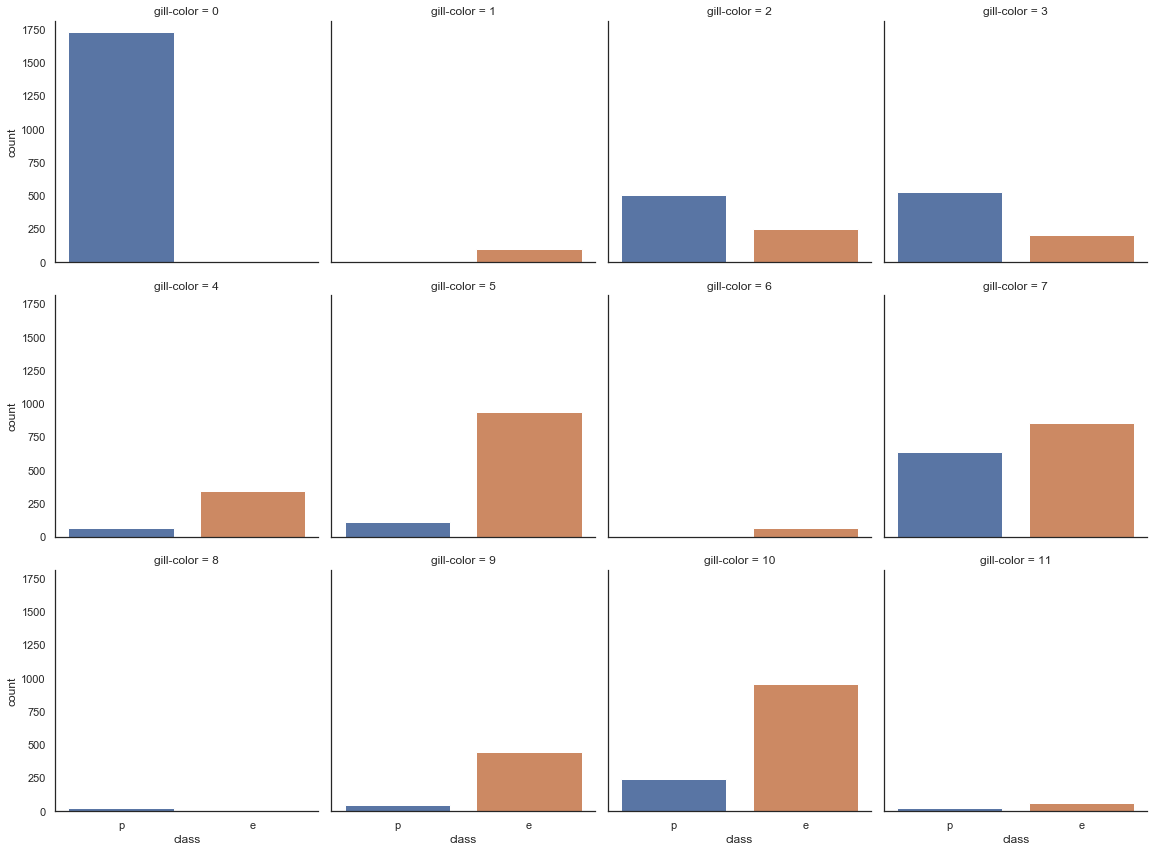

In [11]:
sns.catplot('class', col='gill-color', data=dfc, col_wrap=4, kind='count', height=4)